In [530]:
import random
import numpy as np
import networkx as nx 
from dijkstar import Graph, find_path

In [531]:
def generate_instance_matrix(nb_vertex, min_weight, max_weight, density):
  graph = np.ones((nb_vertex, nb_vertex)) * np.inf
  for i in range(nb_vertex - 1):
    for j in range(i+1, nb_vertex):
      if random.uniform(0, 1) < density:
        weight = random.randint(min_weight, max_weight)
        graph[i, j] = weight
        graph[j, i] = weight
  for i,line in enumerate(graph):
    index_zeros = np.where(line == np.inf)[0]
    index_zeros = np.delete(index_zeros, np.where(index_zeros == i))
    for j in range(len(index_zeros) - (nb_vertex - 3)):
      index = random.choice(index_zeros)
      index_zeros = np.delete(index_zeros, np.where(index_zeros == index))
      weight = random.randint(min_weight, max_weight)
      graph[i, index] = weight
      graph[index, i] = weight
  return graph

def convert_graph(graph):
  graph_dijkstra = Graph()
  for i in range(len(graph)):
    for j in range(len(graph)):
      graph_dijkstra.add_edge(i, j,graph[i][j])
  return graph_dijkstra

def get_distance_between_nodes(graph, i, j):
  if (graph[i][j] != np.inf):
    return graph[i][j], [i, j]
  else:
    if i != j:
      shortest_path = find_path(graph, i,j)
      return shortest_path.total_cost, shortest_path.nodes
    else:
      return 0, None

def get_complete_graph(graph, node_list):
  all_paths = {}
  converted_graph = convert_graph(graph)
  complete_graph = np.zeros((len(node_list), len(node_list)))
  for i in node_list:
    voisins_array = np.delete(node_list, np.where(node_list == i))
    for j in voisins_array:
      distance, path = get_distance_between_nodes(converted_graph, i, j)
      converted_graph_i = np.where(node_list == i)[0][0]
      converted_graph_j = np.where(node_list == j)[0][0]
      complete_graph[converted_graph_i][converted_graph_j] = distance
      all_paths[(converted_graph_i, converted_graph_j)] = path
  return complete_graph, all_paths

def get_random_vertex(size, nb_vertex):
  random_vertex = []
  all_vertex = np.array(range(size))
  for _ in range(nb_vertex):
    value = random.choice(all_vertex)
    random_vertex.append(value)
    all_vertex = np.delete(all_vertex, np.where(all_vertex == value))
  return np.array(random_vertex)

def generate_interval():
  interval = random.choice(range(1,4))
  shift = random.choice(range(0, 11-interval))
  return(shift*60, (shift+interval)*60)

def generate_instance(nb_vertex_matrix, min_weight, max_weight, density, random_vertex):
  graph = generate_instance_matrix(nb_vertex_matrix, min_weight, max_weight, density)
  complete_graph, all_paths = get_complete_graph(graph, random_vertex)
  return graph, complete_graph, all_paths

def get_complete_path(path, all_paths):
  complete_path = []
  for i in range(len(path) - 1):
    complete_path.extend(all_paths[(path[i], path[i+1])][:-1])
    if i == len(path) - 2:
      complete_path.append(all_paths[(path[i], path[i+1])][-1])
  return complete_path

def is_path_in_interval(path, complete_graph, interval, vertex):
  weight = 0
  for i in range(np.where(np.array(path) == vertex)[0][0]):
    weight += complete_graph[path[i]][path[i+1]]
  if weight >= interval[0] and weight <= interval[1]:
    return True
  else:
    return False

def generate_neighbours(path, complete_graph, interval, vertex):
  neighbours = []
  for i in range(len(path)):
    for j in range(i + 1, len(path)-1):
      new_neighbour = path.copy()

      new_neighbour[i] = path[j]
      new_neighbour[j] = path[i]
      
      if is_path_in_interval(new_neighbour, complete_graph, interval, vertex) and new_neighbour[0] == new_neighbour[-1]:
        neighbours.append(new_neighbour)
  return neighbours

def generate_random_path(nb_vertex, start_vertex):
  path = np.arange(nb_vertex)
  path = np.delete(path, np.where(path == start_vertex))
  np.random.shuffle(path)
  path = np.append(path, start_vertex)
  path = np.insert(path, 0, start_vertex)
  return path

In [ ]:
path =
complete_path = 
interval = 
all_paths = 

In [536]:
# generate the neighbours of a path
neighbours = generate_neighbours(path, complete_graph, interval, 0)

In [538]:
complete_path = get_complete_path(path, all_paths)

In [540]:
from pulp import *
import numpy as np


X=[]
P = []
X_dict = {}
True_tab = []



# variables du problème
for i in range(len(complete_graph)):
    for j in range(len(complete_graph)):
        X.append(LpVariable("X_" + str(i) + "_" + str(j), 0, 1, LpInteger))
        X_dict[("X_" + str(i) + "_" + str(j))] = LpVariable("X_" + str(i) + "_" + str(j), 0, 1, LpInteger)
        P.append(complete_graph[i][j])

# probleme
prob = LpProblem("plus court chemin", LpMinimize)

# objectif
# Somme de la multiplication des poids de chaque arc
prob += lpSum([P[i] * X[i] for i in range(len(P))])

# contraintes
# La somme d'un arc doit etre egale a 1
X_np = np.array(X)
X_np_reshape = X_np.reshape(len(complete_graph), len(complete_graph))

for i in range(len(X_np_reshape)):
    prob += lpSum(X_np_reshape[i]) == 1
    prob += X_np_reshape[i][i] == 0
    for j in range(len(X_np_reshape)):
        if i != j:
            prob += X_np_reshape[i][j] + X_np_reshape[j][i] <= 1


prob.solve()
print(LpStatus[prob.status])
print("Min=", value(prob.objective))

# variables resultat
for v in prob.variables():
    print("%s=%.2f"%(v.name,v.varValue), end=', ')


Optimal
Min= 168.0
X_0_0=0.00, X_0_1=1.00, X_0_2=0.00, X_0_3=0.00, X_1_0=0.00, X_1_1=0.00, X_1_2=1.00, X_1_3=0.00, X_2_0=1.00, X_2_1=0.00, X_2_2=0.00, X_2_3=0.00, X_3_0=0.00, X_3_1=1.00, X_3_2=0.00, X_3_3=0.00, 

In [541]:
nb_iterations=1000 #Dans la boucle while de la boucle principale
T0 = 300 #Température de départ
Tmin = 1e-2 #Température minimale
tau = 1e4 #Pour la loi de refroidissement


In [542]:
def distance_tot(matrice,path_matrix):
    distance_tot = 0
    ind = 2
    points = [0,0]
    for i in range(len(path_matrix)):
        if i == 0:
            points = path_matrix[0:2]
            distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
        else:
            if (ind <= len(matrice)):
                points = path_matrix[ind-1:ind+1]
                distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
                ind += 1
    return distance_tot

print(distance_tot(complete_graph,path))


181.0


In [543]:
from ipywidgets import IntProgress 
from IPython.display import display

def recuit_simule_matrix(matrix,path):
    bar = IntProgress(min=0, max=nb_iterations, layout={"width" : "100%"})
    display(bar)
    i_tab = []
    T_Tab = []
    distance_tab = []

    distance = distance_tot(matrix,path)
    solution = np.copy(path)
    i = 0
    T=T0

    while T>Tmin and i<nb_iterations:
        i_tab.append(i)
        T_Tab.append(T)
        distance_tab.append(distance)
        i+=1

        #Loi de refroidissement
        T = T0 * np.exp(-i/tau)

        solution_voisine = neighbours[np.random.randint(0, len(neighbours))]
        
        while is_path_in_interval(solution_voisine, matrix, interval, 3) == False:
            solution_voisine = neighbours[np.random.randint(0, len(neighbours))]

        #Création de la nouvelle solution proche de la precedente
        

        #Comparaison des deux valeurs
        difference = distance_tot(matrix,solution) - distance_tot(matrix,solution_voisine)

        # Si la nouvelle solution est meilleure, on la prend
        if difference > 0:
            solution = solution_voisine
            distance = distance_tot(matrix,solution_voisine)
        
        # Sinon, on prend la solution actuelle
        else:
            if np.random.uniform() > np.exp(-difference/T): #on accepte la solution avec une certaine probabilité. 
                solution=solution_voisine
                distance=distance_tot(matrix,solution_voisine)
        
        print(i,T,distance)
        bar.value += 1
    bar.close()
    return solution,distance,i_tab,T_Tab,distance_tab
    
solution, distance, i_tab, T_tab, distance_tab = recuit_simule_matrix(complete_graph,path)


IntProgress(value=0, layout=Layout(width='100%'), max=1000)

1 299.97000149995 181.0
2 299.94000599960003 181.0
3 299.91001349865013 181.0
4 299.88002399680033 181.0
5 299.8500374937508 181.0
6 299.82005398920165 181.0
7 299.790073482853 181.0
8 299.7600959744051 181.0
9 299.7301214635582 181.0
10 299.70014995001253 181.0
11 299.67018143346826 181.0
12 299.6402159136259 181.0
13 299.6102533901857 181.0
14 299.580293862848 181.0
15 299.55033733131324 181.0
16 299.52038379528193 181.0
17 299.4904332544544 181.0
18 299.46048570853117 181.0
19 299.4305411572128 181.0
20 299.40059960019994 181.0
21 299.370661037193 181.0
22 299.3407254678927 181.0
23 299.31079289199965 181.0
24 299.2808633092145 181.0
25 299.25093671923804 181.0
26 299.2210131217709 181.0
27 299.19109251651395 181.0
28 299.1611749031679 181.0
29 299.1312602814336 181.0
30 299.1013486510119 181.0
31 299.07144001160367 181.0
32 299.0415343629099 181.0
33 299.01163170463144 181.0
34 298.9817320364693 181.0
35 298.95183535812447 181.0
36 298.921941669298 181.0
37 298.89205096969096 181.0

Au bout de  1000 itérations, la meilleure solution avec le mélange simple est de visiter les villes dans cet ordre :
0 ->
2 ->
1 ->
3 ->
0 ->
La distance parcourue de la 1ere liste était de  181.0 km.
La distance parcourue au total est de  181.0 km.


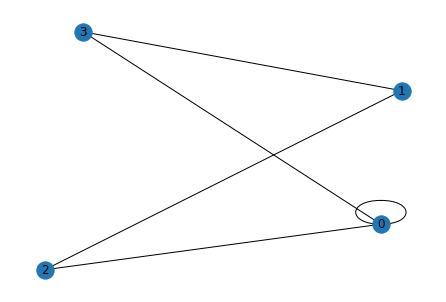

In [546]:
def afficher_villes(liste):
    for i in range(0,len(liste)):
        print(liste[i],"->")

print ("Au bout de ",nb_iterations,"itérations, la meilleure solution avec le mélange simple est de visiter les villes dans cet ordre :")
afficher_villes(solution)

print("La distance parcourue de la 1ere liste était de ", distance_tot(complete_graph,path), "km.")
print("La distance parcourue au total est de ", distance_tot(complete_graph,solution), "km.") 

tab_path_real = get_complete_path(solution, all_paths)

G = nx.Graph()
G.add_nodes_from(solution)
for i in range(len(solution)):
    G.add_edge(solution[i],solution[(i+1)%len(solution)])


nx.draw(G, with_labels=True)

1000
1000
1000


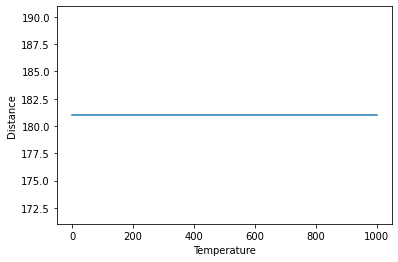

In [545]:
# explore temperature vs algorithm iteration for simulated annealing
from matplotlib import pyplot


print(len(i_tab))
print(len(T_tab))
print(len(distance_tab))

# plot T_tab vs distance_tab
pyplot.plot(distance_tab)


pyplot.xlabel('Temperature')
pyplot.ylabel('Distance')
pyplot.show()